In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
results_path = 'Results.xlsx'
results_df = pd.read_excel(results_path, dtype = str)

In [3]:
results_df = results_df.rename(columns={
    'Hora de inicio': 'start_date',
    'Hora de finalización': 'end_date',
    'Selecciona la asignatura':'subject',
    'Selecciona la pregunta': 'question',
    'Conversación con ChatGPT': 'conversation_ChatGPT',
    '¿Cuántas preguntas has realizado a ChatGPT para obtener la mejor respuesta?': 'numTries_ChatGPT',
    'Conversación con Gemini': 'conversation_Gemini',
    '¿Cuántas preguntas has realizado a Gemini para obtener la mejor respuesta?': 'numTries_Gemini',
    'Conversación con Copilot': 'conversation_Copilot',
    '¿Cuántas preguntas has realizado a Copilot para obtener la mejor respuesta?': 'numTries_Copilot',
    '¿Te ha ayudado ChatGPT a responder a la pregunta?': 'rating_ChatGPT',
    '¿Te ha ayudado Gemini a responder a la pregunta?': 'rating_Gemini',
    '¿Te ha ayudado Copilot a responder a la pregunta?': 'rating_Copilot',
    'Indica tu respuesta a la pregunta ':'final_answer'
})#.drop(columns=results_df.columns, errors='ignore')

In [4]:
#results_df = results_df[results_df['subject']=="Desarrollo de Aplicaciones Web"]

## Group by date

In [5]:
results_df['date'] = pd.to_datetime(results_df['start_date'], errors='coerce')
results_df.groupby([results_df['date'].dt.date, 'subject'])['subject'].count()

date        subject                                
2024-03-15  Lenguajes de Programación                  147
2024-04-16  Desarrollo de Aplicaciones Distribuidas      1
            Desarrollo de Aplicaciones Web             195
2024-04-19  Estructura de datos II                      82
2024-04-23  Desarrollo de Aplicaciones Distribuidas     33
2024-05-08  Lenguajes de Programación                   47
2024-05-09  Ampliación de Ingeniería del Software       69
Name: subject, dtype: int64

In [6]:
results_df.loc[(results_df["date"]>"2024-03-15") & (results_df["date"]<"2024-04-15"), "subject"] = "Lenguajes de Programación - Haskell"
results_df.loc[results_df["subject"]=="Lenguajes de Programación", "subject"] = "Lenguajes de Programación - Python"

## Group by subject

In [7]:
results_df.groupby('subject')['subject'].count()

subject
Ampliación de Ingeniería del Software       69
Desarrollo de Aplicaciones Distribuidas     34
Desarrollo de Aplicaciones Web             195
Estructura de datos II                      82
Lenguajes de Programación - Haskell        147
Lenguajes de Programación - Python          47
Name: subject, dtype: int64

In [8]:
results_df['numTries_ChatGPT'] = results_df['numTries_ChatGPT'].astype(int)
results_df['numTries_Gemini'] = results_df['numTries_Gemini'].astype(int)
results_df['numTries_Copilot'] = results_df['numTries_Copilot'].astype(int)

In [9]:
response_map = {
 'Si. Me ha dado la mejor respuesta' : 'Mejor respuesta',
 'Si. Me ha dado una respuesta correcta, pero menos completa que otras IAs': 'Correcta, pero no tan completa',
 'No. Me ha contestado correctamente, pero no responde a la pregunta que le he hecho': 'No responde a la pregunta',
 'No. Me ha contestado de forma errónea': 'Responde incorrectamente'
}
results_df['rating_ChatGPT_reduced'] = results_df['rating_ChatGPT'].apply(lambda rating: response_map[rating])
results_df['rating_Gemini_reduced'] = results_df['rating_Gemini'].apply(lambda rating: response_map[rating])
results_df['rating_Copilot_reduced'] = results_df['rating_Copilot'].apply(lambda rating: response_map[rating])

In [10]:
results_df.head()

,ID,start_date,end_date,Correo electrónico,Nombre,Total de puntos,Comentarios del cuestionario,Hora de la última modificación,subject,Puntos: Selecciona la asignatura,...,rating_Gemini,Puntos: ¿Te ha ayudado Gemini a responder a la pregunta?,Comentarios: ¿Te ha ayudado Gemini a responder a la pregunta?,final_answer,Puntos: Indica tu respuesta a la pregunta,Comentarios: Indica tu respuesta a la pregunta,date,rating_ChatGPT_reduced,rating_Gemini_reduced,rating_Copilot_reduced
0,4,2024-03-15 13:26:03,2024-03-15 13:31:23,a.contreras.2020@alumnos.urjc.es,Alberto Contreras Ruiz,NaN,NaN,NaN,Lenguajes de Programación - Haskell,NaN,...,"Si. Me ha dado una respuesta correcta, pero me...",NaN,NaN,"En Haskell, la aplicación de una función se re...",NaN,NaN,2024-03-15 13:26:03,Mejor respuesta,"Correcta, pero no tan completa","Correcta, pero no tan completa"
1,5,2024-03-15 13:19:25,2024-03-15 13:32:30,e.ruiz.2021@alumnos.urjc.es,Eva Ruiz Aguado,NaN,NaN,NaN,Lenguajes de Programación - Haskell,NaN,...,Si. Me ha dado la mejor respuesta,NaN,NaN,Se refiere a la utilización de dicha función s...,NaN,NaN,2024-03-15 13:19:25,"Correcta, pero no tan completa",Mejor respuesta,"Correcta, pero no tan completa"
2,6,2024-03-15 13:25:56,2024-03-15 13:33:42,c.herce.2018@alumnos.urjc.es,Carlos Herce Nombela,NaN,NaN,NaN,Lenguajes de Programación - Haskell,NaN,...,"Si. Me ha dado una respuesta correcta, pero me...",NaN,NaN,La aplicación de una función es el proceso de ...,NaN,NaN,2024-03-15 13:25:56,"Correcta, pero no tan completa","Correcta, pero no tan completa",Mejor respuesta
3,7,2024-03-15 13:31:31,2024-03-15 13:33:54,ji.bermudez.2016@alumnos.urjc.es,Jose Ignacio Bermudez Robles,NaN,NaN,NaN,Lenguajes de Programación - Haskell,NaN,...,Si. Me ha dado la mejor respuesta,NaN,NaN,"En Haskell, la aplicación de una función se re...",NaN,NaN,2024-03-15 13:31:31,"Correcta, pero no tan completa",Mejor respuesta,"Correcta, pero no tan completa"
4,8,2024-03-15 13:27:36,2024-03-15 13:34:03,r.bargueno.2020@alumnos.urjc.es,Rubén Bargueño Prieto,NaN,NaN,NaN,Lenguajes de Programación - Haskell,NaN,...,Si. Me ha dado la mejor respuesta,NaN,NaN,"En Haskell, la aplicación de una función se re...",NaN,NaN,2024-03-15 13:27:36,"Correcta, pero no tan completa",Mejor respuesta,Mejor respuesta


In [11]:
def numTries_perQuestion(question):
    df = results_df
    if question != 'All':
        df = results_df[results_df['question']==question]
    results = [
        question,
        df['numTries_ChatGPT'].mean(),
        df[df['numTries_Gemini']>0]['numTries_Gemini'].mean(),
        #df['numTries_Gemini'].mean(),
        df['numTries_Copilot'].mean()
    ]
    return results

# Número de preguntas hechas a cada IA (media)

Comentarios:
- Hay 79 respuestas que en Gemini tienen un 0 porque tuvieron problemas con su cuenta de Google

Observaciones preliminares:
- En general, la media de nº de preguntas para todas las IAs es de ~1.2 intentos de pregunta

In [12]:
len(results_df[results_df['numTries_Gemini']==0])

79

In [13]:
rows = [numTries_perQuestion("All")] + [numTries_perQuestion("Pregunta "+str(i)) for i in range(1,7)]
pd.DataFrame(rows,columns=['Question','ChatGPT','Gemini','Copilot']).round(decimals=3)

,Question,ChatGPT,Gemini,Copilot
0,All,1.223,1.196,1.200
1,Pregunta 1,1.221,1.204,1.303
2,Pregunta 2,1.162,1.165,1.143
3,Pregunta 3,1.320,1.205,1.216
4,Pregunta 4,1.064,1.198,1.074
5,Pregunta 5,1.244,1.100,1.207
6,Pregunta 6,1.365,1.323,1.243


In [14]:
colors = {
    'Mejor respuesta':  'gold',
    'Correcta, pero no tan completa': 'silver', 
    'No responde a la pregunta': 'salmon', 
    'Responde incorrectamente': 'orangered'
}

def ia_rating_pieChart(ia, question, ax):
    df = results_df[results_df['question']==question].groupby(['rating_'+ia+'_reduced']).count()
    df.plot.pie(
        y='question', ylabel='', autopct='%1.1f%%', #labeldistance=None,
        title="¿Te ha ayudado %s a responder a la %s?"%(ia, question),
        ax=ax, legend=False, colors=[colors[name] for name in df.index]
    )
    #.legend(bbox_to_anchor=(1,1), loc="lower right", bbox_transform=plt.gcf().transFigure)

# Cuánto ha ayudado cada IA en cada pregunta

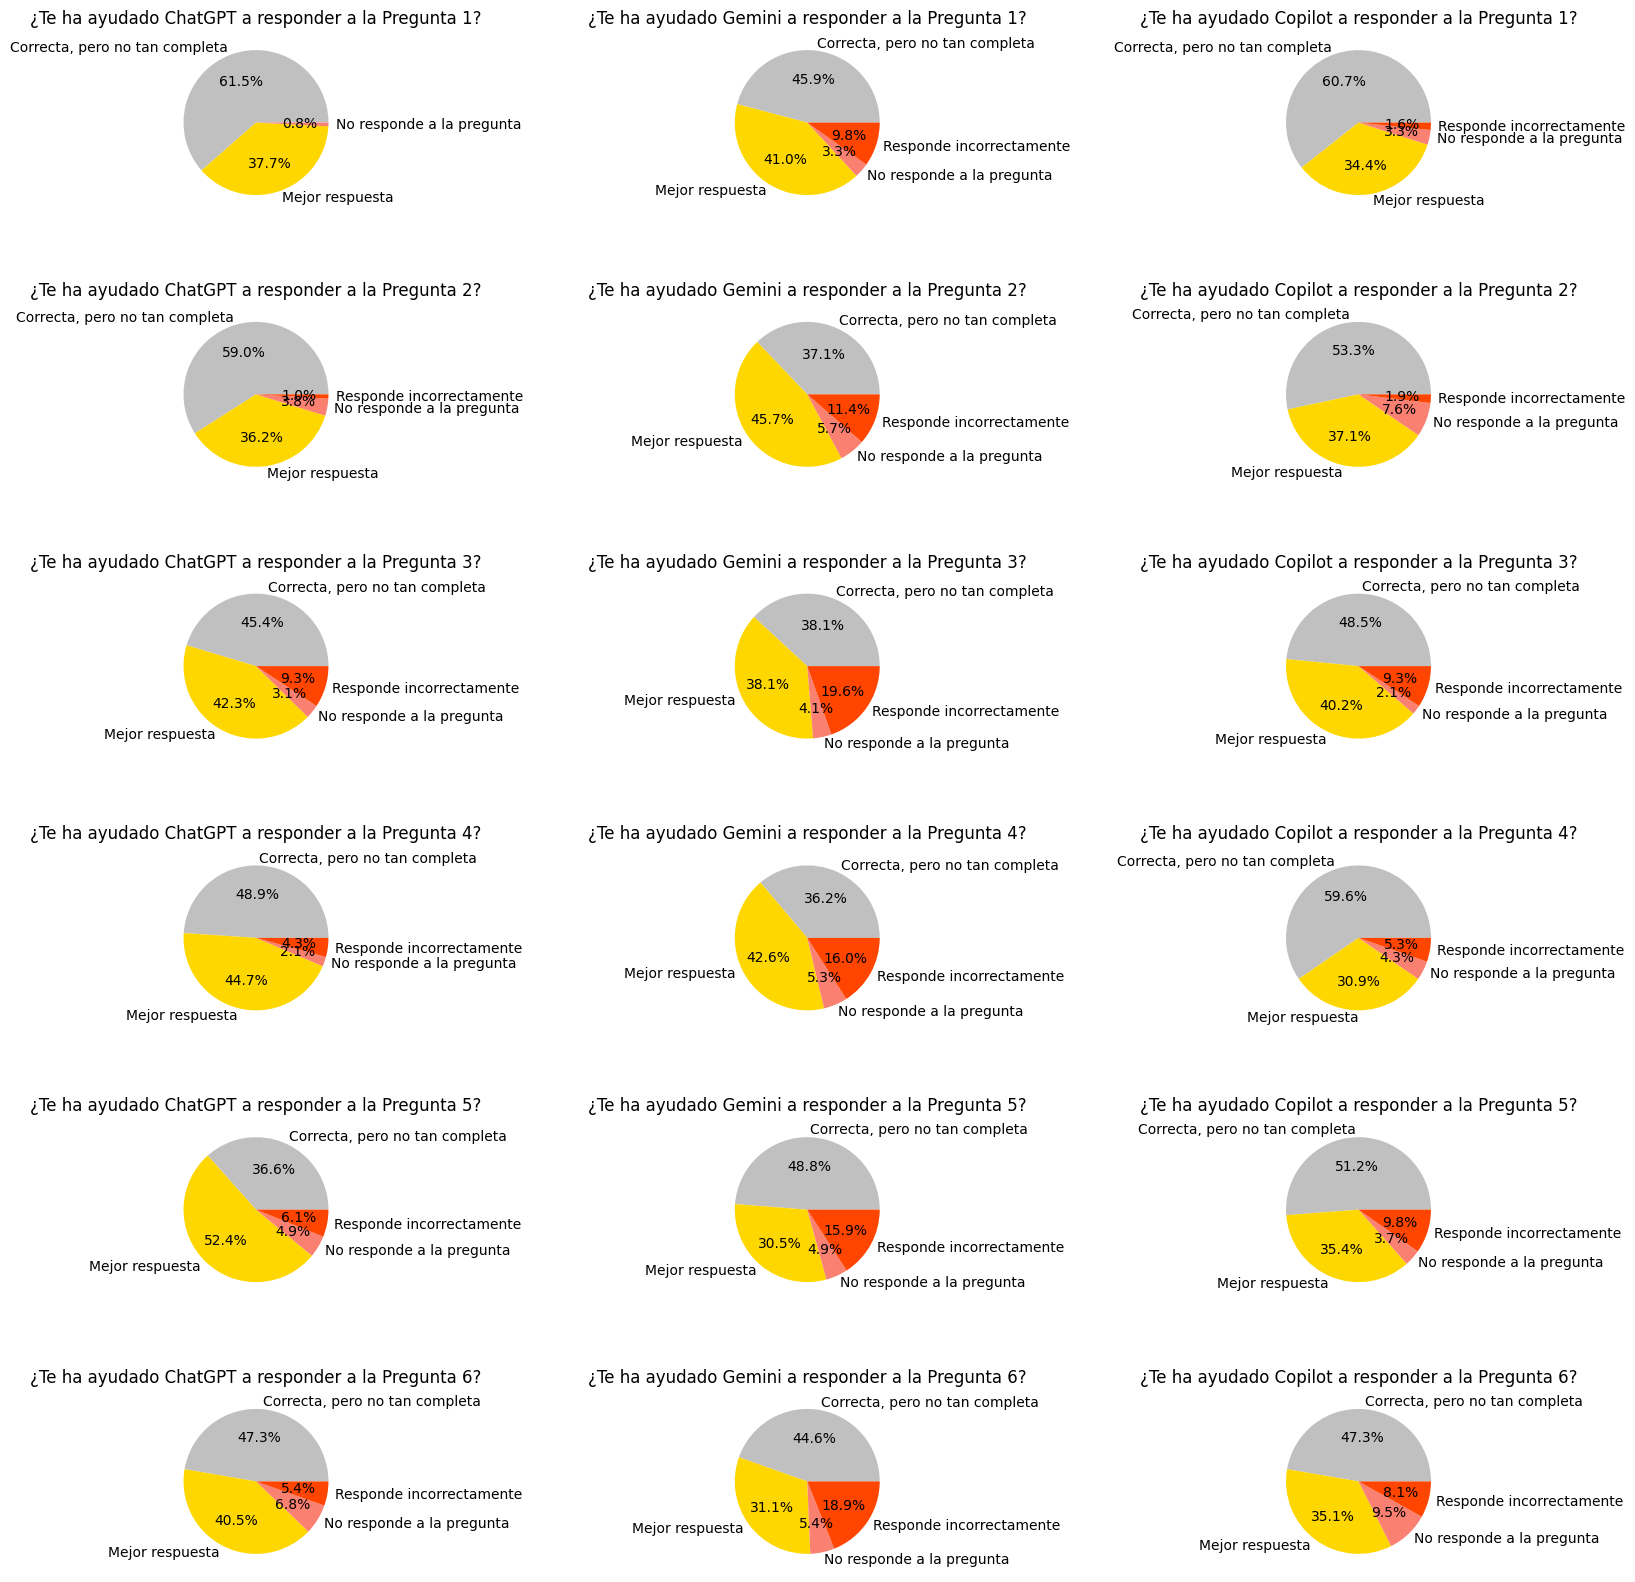

In [15]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(21,20))
fig.subplots_adjust(hspace=0.5, wspace=0.05)

row,col = 0,0
for question in range(1,7):
    for ia in ['ChatGPT','Gemini','Copilot']:
        ia_rating_pieChart(ia, 'Pregunta '+str(question), axes[row,col])
        if col == 2:
            col = 0
            row = row + 1
        else:
            col+=1